# **Achievement No. 6: Advanced Analytics and Dashboard Design (IV)**

## 2026 QS World University Rankings

### **Contents**

##### 1) Importing libraries

##### 2) Importing the data set

##### 3) Cleaning

##### 4) Exploring data visually

##### 5) Reshaping variables

##### 6) Splitting data into training and test sets

##### 7) Linear regression

##### 8) Interpretation

##### 9) Comparison: Predicted 'y' values vs Actual 'y' values

##### 10) Final thoughts

### **1) Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### **2) Importing the data set**

In [4]:
path = r'C:\Users\andd0\Documents\Jupyter_Advanced Analytics and Dashboard Design'

In [5]:
df_2026_ranking = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Advanced Analytics and Dashboard Design (III).csv'), index_col = False)

### **3) Cleaning**

In [6]:
df_2026_ranking.shape

(1501, 32)

##### **Missing values**

In [7]:
# Check for missing values

df_2026_ranking.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
2026 Rank              0
Previous Rank          0
Institution Name       0
Country/Territory      0
Region                 0
Size                   0
Focus                  0
Research               1
Status                 2
AR SCORE               0
AR RANK                0
ER SCORE               0
ER RANK                0
FSR SCORE              0
FSR RANK               0
CPF SCORE              0
CPF RANK               0
IFR SCORE             87
IFR RANK               0
ISR SCORE             37
ISR RANK               0
ISD SCORE             37
ISD RANK               0
IRN SCORE              2
IRN RANK               0
EO SCORE               0
EO RANK                0
SUS SCORE             24
SUS RANK               0
Overall SCORE        798
dtype: int64

In [8]:
# Handling Research and Status

df_2026_ranking['Research'].fillna('N/A', inplace=True)

C:\Users\andd0\AppData\Local\Temp\ipykernel_3576\2484820130.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2026_ranking['Research'].fillna('N/A', inplace=True)


In [9]:
df_2026_ranking['Status'].fillna('N/A', inplace=True)

C:\Users\andd0\AppData\Local\Temp\ipykernel_3576\1285781204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2026_ranking['Status'].fillna('N/A', inplace=True)


In [10]:
# Check for missing values again

df_2026_ranking.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
2026 Rank              0
Previous Rank          0
Institution Name       0
Country/Territory      0
Region                 0
Size                   0
Focus                  0
Research               0
Status                 0
AR SCORE               0
AR RANK                0
ER SCORE               0
ER RANK                0
FSR SCORE              0
FSR RANK               0
CPF SCORE              0
CPF RANK               0
IFR SCORE             87
IFR RANK               0
ISR SCORE             37
ISR RANK               0
ISD SCORE             37
ISD RANK               0
IRN SCORE              2
IRN RANK               0
EO SCORE               0
EO RANK                0
SUS SCORE             24
SUS RANK               0
Overall SCORE        798
dtype: int64

##### **Duplicates**

In [11]:
dups = df_2026_ranking.duplicated()

In [12]:
dups.shape # No dups

(1501,)

### **4) Exploring data visually**

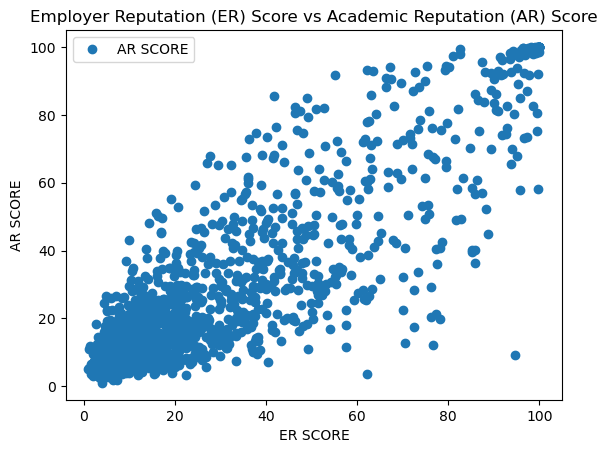

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2026_ranking.plot(x = 'ER SCORE', y='AR SCORE',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Employer Reputation (ER) Score vs Academic Reputation (AR) Score')  
plt.xlabel('ER SCORE')  
plt.ylabel('AR SCORE')  
plt.show()

##### **Hypothesis**

*The higher the Employer Reputation (employer feedback), the higher the Academic Reputation (reputation of universities and their programmes)*

##### [More about AR](https://support.qs.com/hc/en-gb/articles/4405952675346-Academic-Reputation-Indicator)

##### [More about ER](https://support.qs.com/hc/en-gb/articles/4407794203410-Employer-Reputation-Indicator)

### **5) Reshaping variables**

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2026_ranking['ER SCORE'].values.reshape(-1,1)
y = df_2026_ranking['AR SCORE'].values.reshape(-1,1)

In [15]:
X

array([[100. ],
       [100. ],
       [100. ],
       ...,
       [  2.7],
       [  2.9],
       [ 11.9]])

In [16]:
y

array([[100. ],
       [ 99.6],
       [100. ],
       ...,
       [  8.3],
       [  4.4],
       [  6.5]])

### **6) Splitting data into training and test sets**

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### **7) Linear regression**

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

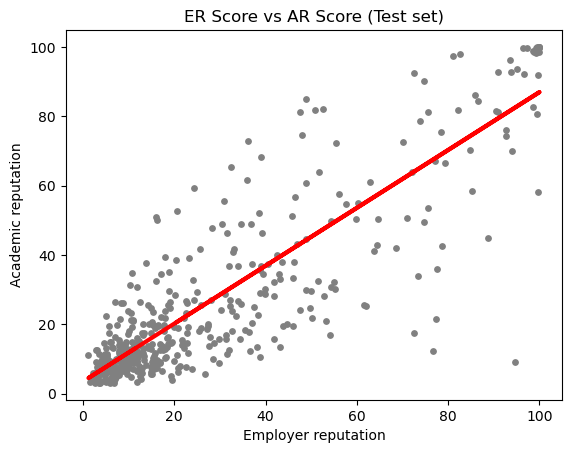

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ER Score vs AR Score (Test set)')
plot_test.xlabel('Employer reputation')
plot_test.ylabel('Academic reputation')
plot_test.show()

### **8) Interpretation**

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83444272]]
Mean squared error:  165.63071461925054
R2 score:  0.7373258703009452


| Summary Stat Name | Meaning |
|-------------------|---------|
| Slope             | Tells how the y variable changes when X changes |
| MSE               | Tells how close a regression line is to a set of points (i.e., its accuracy). The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. |
| R²                | Tells how well the model explains the variance in the data. Values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. |

##### **How well the line appears to fit the data in a markdown cell?**

##### The upward slope shows a positive relationship between Employer Reputation (independent variable) and Academic Reputation (dependent variable). 

##### Still, I can see noticeable scattering, meaning that, while the model correctly captures the overall trend, it is not accurate at predicting individual cases.

##### **Check the model performance statistics—MSE and R2 score.**

##### **MSE**

##### MSE = 165.63. 
##### AR Score avg = 25.78.

##### To interpret the MSE in the same unites as the AR, I will take the square root of 165.63, which is 12.87.

##### 12.87 is 49.9% of the AR Score mean. 

##### In other words, if Academic Reputation scores were like exam grades, the model is typically off by about 13 points (12.87) — so if it predicts a score of 80, the real score might be closer to 67 or 93.

##### Therefore, the MSE is relatively large.

##### **R2 Score**

##### R2 = 0.73

##### The model explains 73% of the variance in the AR Score based on the Employer Reputation.

##### The Employer Reputation of a university gives us a pretty good idea of its Academic Reputation. 

### **9) Comparison: Predicted 'y' values vs Actual 'y' values**

In [24]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.7,20.695725
1,98.3,86.282922
2,6.5,13.436073
3,98.6,86.867032
4,7.0,10.265191
5,3.5,4.841313
6,19.9,9.764525
7,67.0,67.841738
8,48.8,32.461367
9,6.3,20.862614


##### **Remarks**

##### I'd say that, on average, the model’s predictions miss by about 13 points.

### **10) Final thoughts**

##### While the R2 score - closer to 1 - indicates a good fit, the RMSE is still high, which indicates that individual predictions are not as accurate as expected. Therefore, I'd say that the model's performance is good, but must definitely be improved.

##### When it comes to bias, the Employer Reputation - based on employers' feedback - could be biased by employers' preferences, perceptions, and the like. Any score based on human feedback may definitely be biased in some way.